# Plots

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from IPython.display import display
from inspect import signature
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution as DE


save_as_pgf = 0
save_as_png = 0

if save_as_pgf == 1:
  mpl.use("pgf")
  mpl.rc('text', usetex=True)
  mpl.rc('pgf', texsystem='pdflatex')
  mpl.rc('pgf', rcfonts=False)
  mpl.rc('pgf', preamble="\n".join([
         r"\usepackage[utf8x]{inputenc}",
         r"\usepackage[T1]{fontenc}",
         r"\usepackage{amsmath,amsfonts,amsthm,amssymb,amstext}"]))
  mpl.rc('font', size=10)
  mpl.rc('font', family='sans-serif')
  mpl.rc('font', serif='Computer Modern')
  mpl.rc('axes', titlesize=10)    # fontsize of the axes title
  mpl.rc('axes', labelsize=8)     # fontsize of the x and y labels
  mpl.rc('xtick', labelsize=8)    # fontsize of the tick labels
  mpl.rc('ytick', labelsize=8)    # fontsize of the tick labels
  mpl.rc('legend', fontsize=7)
  mpl.rc('figure', titlesize=10)  # fontsize of the figure title
  mpl.rc('lines', markersize=2)
  mpl.rc('lines', marker="")
  mpl.rc('grid', alpha=0.4),
  mpl.rc('grid', color="gray")
  mpl.rc('grid', linewidth=0.5)

  lw = 0.5
  ms_4 = 2
  ms_8 = 4

  # width of tex document in inches
  fig_width = 6.0045
  fig_height = fig_width * 0.6
else:
  mpl.rc('font', size=16)          # controls default text sizes
  mpl.rc('axes', titlesize=16)     # fontsize of the axes title
  mpl.rc('axes', labelsize=18)     # fontsize of the x and y labels
  mpl.rc('xtick', labelsize=16)    # fontsize of the tick labels
  mpl.rc('ytick', labelsize=16)    # fontsize of the tick labels
  mpl.rc('legend', fontsize=18)    # legend fontsize
  mpl.rc('figure', titlesize=18)   # fontsize of the figure title
  mpl.rc('grid', alpha=0.4)
  mpl.rc('lines', markersize=10)
  mpl.rc('grid', alpha=0.4)

  lw = 1
  ms_4 = 4
  ms_8 = 8

  # height and width for nice print in jupyter notebook
  fig_width = 20
  fig_height = 10


# number of decimals printed in numpy stuff
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

# uni bonn colors
blue = "#07529a"
yellow = "#ffb90c"

# number of decimals
format1dec = mpl.ticker.FormatStrFormatter('%.1f')
format2dec = mpl.ticker.FormatStrFormatter('%.2f')


### Functions

In [2]:
def save_plot_as_pgf(fig, path):
  if save_as_pgf == 1:
    fig.savefig(path, format="pgf")


def save_plot_as_png(fig, path):
  if save_as_png == 1:
    fig.savefig(path, format="png")


def checkForFaultyData(df):
  if df.isnull().sum().sum() != 0:
    null_vals = np.count_nonzero(df.isnull().values.ravel())
    display(df[df.isnull().any(axis=1)].head())
    df.dropna(how='any', inplace=True)
    print(f"WARNING! Found {null_vals} null values total.")
  return df

### Energy Conservation

In [3]:
df = pd.read_csv("../out/energy.csv")

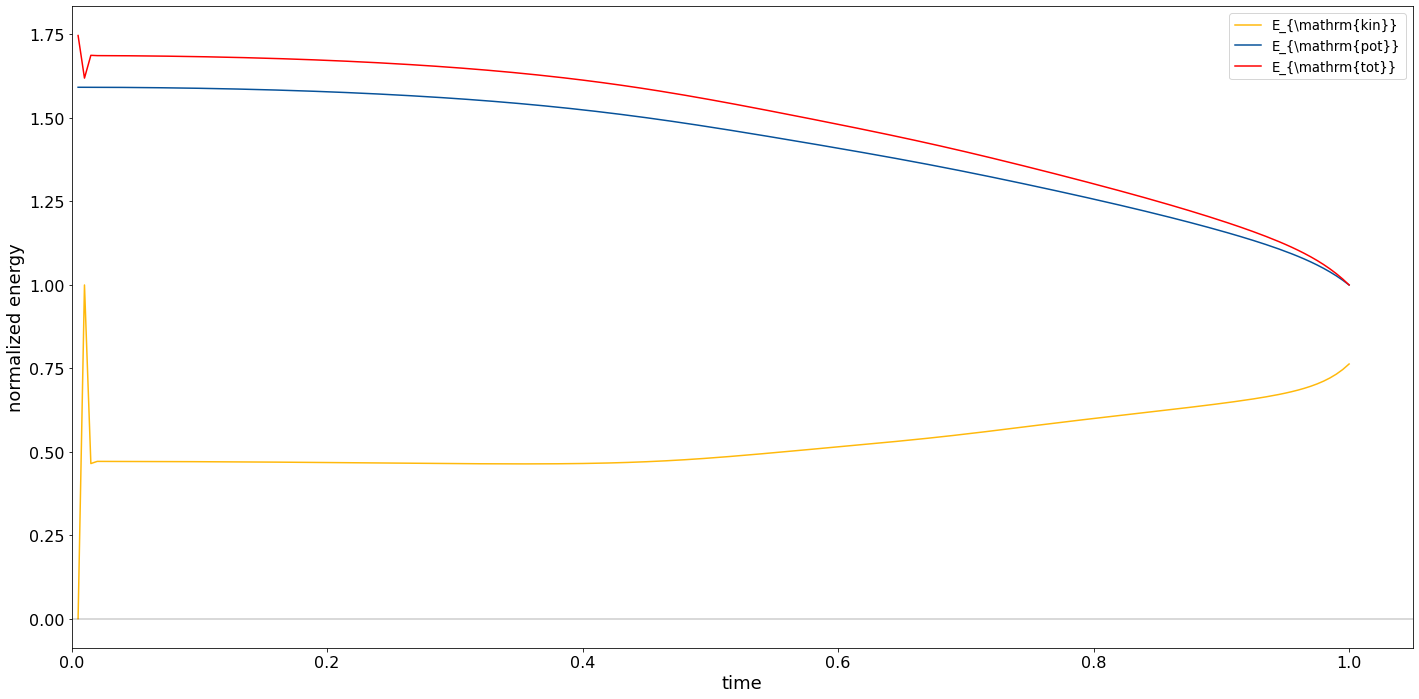

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(
    fig_width, fig_height))

ax.plot(df["time"], df["e_kin"] / df["e_kin"].max(), ls="-",
        label=r"E_{\mathrm{kin}}", c=yellow)
ax.plot(df["time"], df["e_pot"] / df["e_pot"].max(), ls="-",
        label=r"E_{\mathrm{pot}}", c=blue)
ax.plot(df["time"], df["e_tot"] / df["e_tot"].max(), ls="-",
        label=r"E_{\mathrm{tot}}", c="r")

ax.set_xlabel("time")
ax.set_ylabel("normalized energy")
ax.set_xlim(left=0)
ax.legend(loc="best", fancybox=True, fontsize="small")
ax.axhline(y=0, c="k", ls="-", lw=0.3)

fig.tight_layout()
save_plot_as_pgf(fig, "img/energy.pgf")
save_plot_as_png(fig, "img/energy.png")
plt.show()
